In [123]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer

#### Overview of the Data

##### Creditcard data overview

In [124]:
df = pd.read_csv('C:/Users/elbet/OneDrive/Desktop/Ten/week8&9/github/Fraud_detection/Data/creditcard/creditcard.csv')
print("DataFrame Info:")
display(df.info())

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64

None

In [125]:
print("\nFirst 5 Rows:")
display(df.head())


First 5 Rows:


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [126]:
display(df.columns)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

##### Data cleaning

In [127]:
# Handling missing values in the 'Time' column
if 'Time' in df.columns:
    if df['Time'].isna().sum() > 0:
        df.dropna(subset=['Time'], inplace=True)
        print("Dropped rows with missing 'Time' values.")
    else:
        print("'Time' column has no missing values.")
else:
    print("'Time' column is missing from the dataset.")

# Handling anonymized features (v1 to v8)
anonymized_features = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8','V9', 'V10', 'V11', 'V12', 'V13'
                       , 'V14', 'V15', 'V16','V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24','V25',
                         'V26', 'V27', 'V28']

missing_anonymized_features = [col for col in anonymized_features if col not in df.columns]
if missing_anonymized_features:
    print(f"Missing columns: {missing_anonymized_features}")
else:
    # Check if there are any missing values in the anonymized features
    if df[anonymized_features].isna().sum().sum() > 0:
        knn_imputer = KNNImputer(n_neighbors=5)
        df[anonymized_features] = knn_imputer.fit_transform(df[anonymized_features])
        print("Applied KNN imputation for anonymized features.")
    else:
        print("No missing values in anonymized features (v1 to v8).")

# Handling missing values in 'amount'
if 'Amount' in df.columns:
    if df['Amount'].isna().sum() > 0:
        df['Amount'].fillna(df['Amount'].median(), inplace=True)
        print("Filled missing 'amount' values with median.")
        df['Amount'] = pd.to_numeric(df['Amount'], errors='coerce')
        print("Converted 'amount' to numeric.")

    else:
        print("'amount' column has no missing values.")
else:
    print("'amount' column is missing from the dataset.")

# Handling missing values in 'class'
if 'Class' in df.columns:
    if df['Class'].isna().sum() > 0:
        df.dropna(subset=['Class'], inplace=True)
        print("Dropped rows with missing 'class' values.")
    else:
        print("'class' column has no missing values.")
else:
    print("'class' column is missing from the dataset.")

# Remove Duplicates
df.drop_duplicates(inplace=True)
print("Removed duplicate rows.")

'Time' column has no missing values.
No missing values in anonymized features (v1 to v8).
'amount' column has no missing values.
'class' column has no missing values.
Removed duplicate rows.


##### Fraud_data overview

In [128]:
df1 = pd.read_csv('C:/Users/elbet/OneDrive/Desktop/Ten/week8&9/github/Fraud_detection/Data/Fraud_Data.csv')
print("DataFrame Info:")
display(df1.info())

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         151112 non-null  int64  
 1   signup_time     151112 non-null  object 
 2   purchase_time   151112 non-null  object 
 3   purchase_value  151112 non-null  int64  
 4   device_id       151112 non-null  object 
 5   source          151112 non-null  object 
 6   browser         151112 non-null  object 
 7   sex             151112 non-null  object 
 8   age             151112 non-null  int64  
 9   ip_address      151112 non-null  float64
 10  class           151112 non-null  int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 12.7+ MB


None

In [129]:
print("\nFirst 5 Rows:")
display(df1.head())


First 5 Rows:


,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0


In [130]:
display(df1.columns)

Index(['user_id', 'signup_time', 'purchase_time', 'purchase_value',
       'device_id', 'source', 'browser', 'sex', 'age', 'ip_address', 'class'],
      dtype='object')

In [131]:
# Handling missing time columns (signup_time, purchase_time)
if 'signup_time' in df1.columns and 'purchase_time' in df1.columns:
    df1.dropna(subset=['signup_time', 'purchase_time'], inplace=True)
    df1['signup_time'] = pd.to_datetime(df1['signup_time'], errors='coerce')
    print("Converted 'signup_time' to datetime.")
    df1['purchase_time'] = pd.to_datetime(df1['purchase_time'], errors='coerce')
    print("Converted 'purchase_time' to datetime.")
    
else:
    print("One or both time columns ('signup_time', 'purchase_time') are missing.")

# For purchase_value, we use median imputation if the column exists and has missing values
if 'purchase_value' in df1.columns:
    if df1['purchase_value'].isna().sum() > 0: 
        df1['purchase_value'].fillna(df1['purchase_value'].median(), inplace=True)
    else:
        print("'purchase_value' has no missing values.")
else:
    print("'purchase_value' column is missing from the dataset.")

# For age, we can use median imputation depending on the distribution and missing values
if 'age' in df1.columns:
    if df1['age'].isna().sum() > 0:  
        df1['age'].fillna(df1['age'].median(), inplace=True)
        df1['age'] = pd.to_numeric(df1['age'], errors='coerce')
        print("Converted 'age' to numeric.")
    else:
        print("'age' has no missing values.")
else:
    print("'age' column is missing from the dataset.")


Converted 'signup_time' to datetime.
Converted 'purchase_time' to datetime.
'purchase_value' has no missing values.
'age' has no missing values.


In [132]:
# For source, browser, and sex, fill missing values with the mode only if there are missing values
if 'source' in df1.columns:
    if df1['source'].isna().sum() > 0:
        df1['source'].fillna(df1['source'].mode()[0], inplace=True)
    else:
        print("'source' has no missing values.")
else:
    print("'source' column is missing from the dataset.")

if 'browser' in df1.columns:
    if df1['browser'].isna().sum() > 0:
        df1['browser'].fillna(df1['browser'].mode()[0], inplace=True)
    else:
        print("'browser' has no missing values.")
else:
    print("'browser' column is missing from the dataset.")

if 'sex' in df1.columns:
    if df1['sex'].isna().sum() > 0:
        df1['sex'].fillna(df1['sex'].mode()[0], inplace=True)
    else:
        print("'sex' has no missing values.")
else:
    print("'sex' column is missing from the dataset.")


# Handling user_id and class
# Ensure no missing values in user_id or class, drop rows if class is missing
if 'user_id' in df1.columns and 'class' in df1.columns:
    df1.dropna(subset=['user_id', 'class'], inplace=True)
else:
    print("One or both essential columns ('user_id', 'class') are missing.")

# Remove Duplicates
df1.drop_duplicates(inplace=True)
print("Removed duplicate rows.")

# Convert Categorical Features to 'category' Type
categorical_columns = ['source', 'browser', 'sex', 'country']  
for col in categorical_columns:
    if col in df.columns:
        df1[col] = df1[col].astype('category')
        print(f"Converted '{col}' to 'category' data type.")

'source' has no missing values.
'browser' has no missing values.
'sex' has no missing values.
Removed duplicate rows.


In [133]:
display(df1.columns)

Index(['user_id', 'signup_time', 'purchase_time', 'purchase_value',
       'device_id', 'source', 'browser', 'sex', 'age', 'ip_address', 'class'],
      dtype='object')

##### IPAddress_to_country

In [134]:
df2 = pd.read_csv('C:/Users/elbet/OneDrive/Desktop/Ten/week8&9/github/Fraud_detection/Data/IpAddress_to_Country.csv')
# Display basic information
print("DataFrame Info:")
display(df2.info()) 

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138846 entries, 0 to 138845
Data columns (total 3 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   lower_bound_ip_address  138846 non-null  float64
 1   upper_bound_ip_address  138846 non-null  int64  
 2   country                 138846 non-null  object 
dtypes: float64(1), int64(1), object(1)
memory usage: 3.2+ MB


None

In [135]:
# visualize the first few rows
print("\nFirst 5 Rows:")
display(df2.head())


First 5 Rows:


,lower_bound_ip_address,upper_bound_ip_address,country
0,16777216.0,16777471,Australia
1,16777472.0,16777727,China
2,16777728.0,16778239,China
3,16778240.0,16779263,Australia
4,16779264.0,16781311,China


In [136]:
display(df2.columns)

Index(['lower_bound_ip_address', 'upper_bound_ip_address', 'country'], dtype='object')

#### Data cleaning

In [137]:
# Handling missing values in 'lower_bound_ip_address' and 'upper_bound_ip_address'
if 'lower_bound_ip_address' in df2.columns and 'upper_bound_ip_address' in df2.columns:
    # Drop rows where either 'lower_bound_ip_address' or 'upper_bound_ip_address' is missing
    df2.dropna(subset=['lower_bound_ip_address', 'upper_bound_ip_address'], inplace=True)
    print("Dropped rows with missing IP address range values.")
    # df2['lower_bound_ip_address'] = df2['lower_bound_ip_address'].apply(lambda x: int(x) if pd.notnull(x) else None)
    # print("Converted 'lower_bound_ip_address' to int.")
    # df2['upper_bound_ip_address'] = df2['upper_bound_ip_address'].apply(lambda x: int(x) if pd.notnull(x) else None)
    # print("Converted 'upper_bound_ip_address' to int.")
else:
    print("IP address range columns are missing.")

# Handling missing values in 'country'
if 'country' in df2.columns:
    if df2['country'].isna().sum() > 0:
        # Fill missing 'country' values with "unknown"
        df2['country'].fillna('unknown', inplace=True)
        print("Filled missing 'country' values with 'unknown'.")
    else:
        print("'country' column has no missing values.")
else:
    print("'country' column is missing from the dataset.")


# 1. Remove Duplicates
df2.drop_duplicates(inplace=True)
print("Removed duplicate rows.")

Dropped rows with missing IP address range values.
'country' column has no missing values.
Removed duplicate rows.


#### EDA

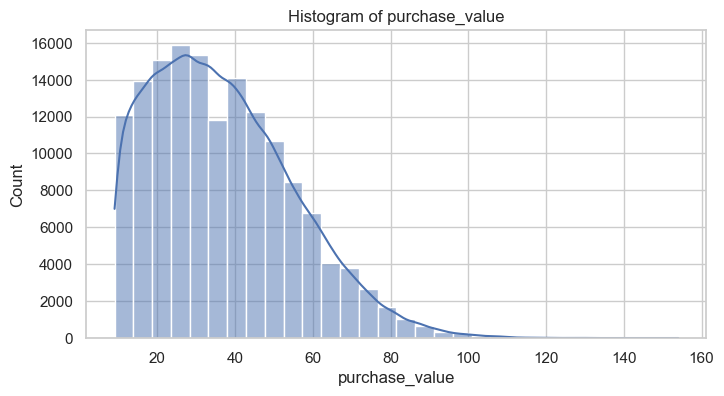

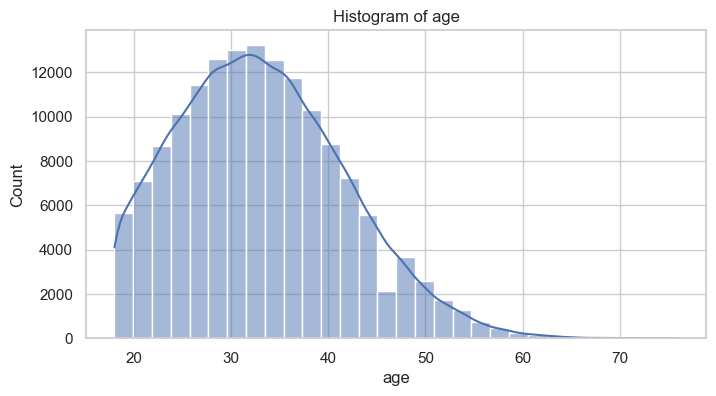

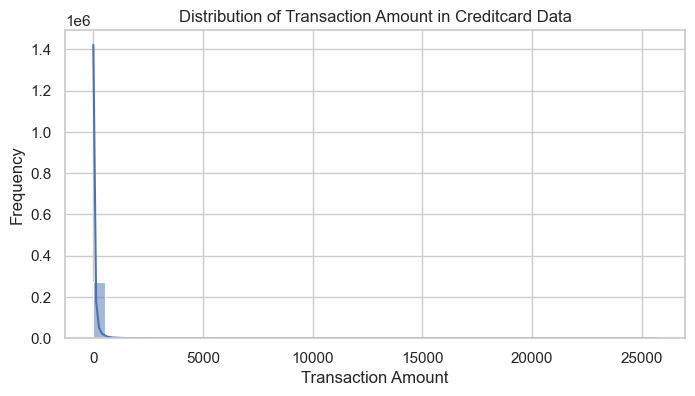

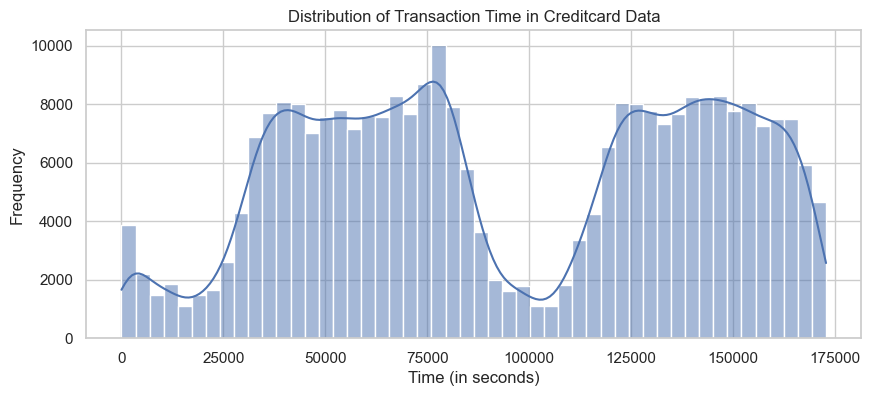

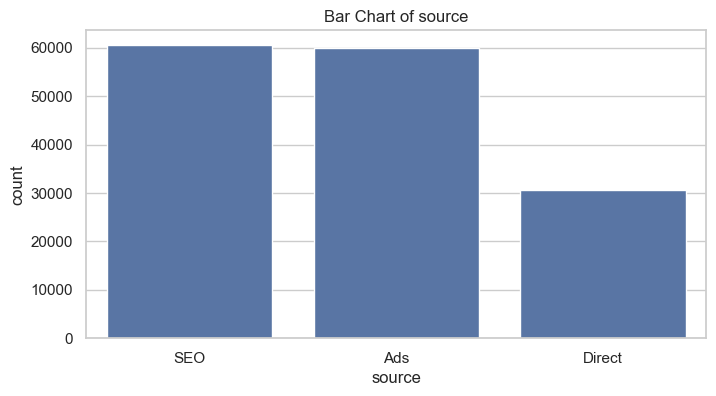

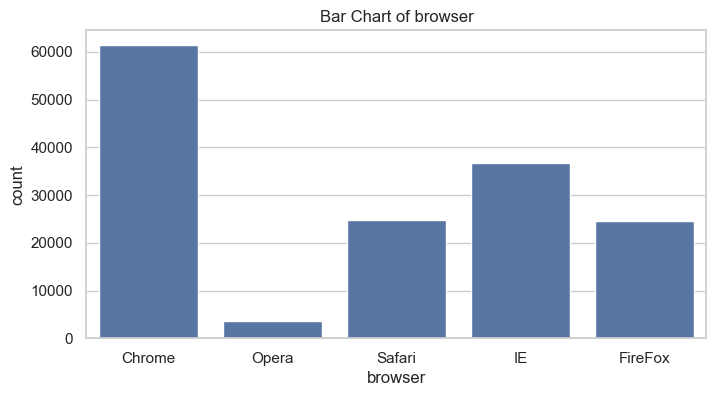

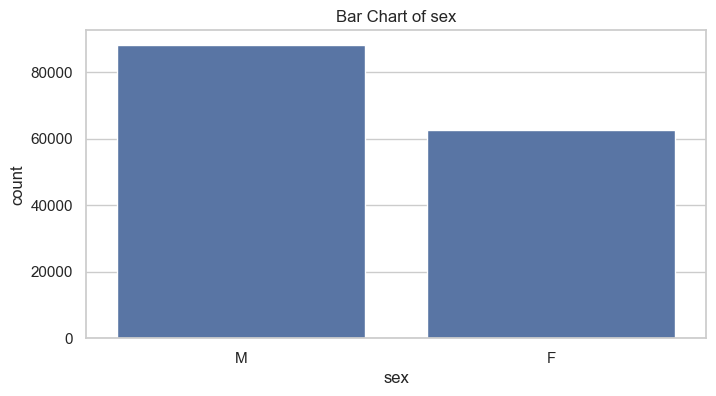

In [138]:
# Set plot style for consistency
sns.set(style="whitegrid")

# Univariate Analysis
# histograms for numerical features (purchase_value and age)
numerical_features = ['purchase_value', 'age'] 
for feature in numerical_features:
    if feature in df1.columns:
        plt.figure(figsize=(8, 4))
        sns.histplot(df1[feature], kde=True, bins=30)
        plt.title(f'Histogram of {feature}')
        plt.show()

# Transaction Amount Distribution
plt.figure(figsize=(8, 4))
sns.histplot(df['Amount'], bins=50, kde=True)
plt.title('Distribution of Transaction Amount in Creditcard Data')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()

# Time Feature Analysis
plt.figure(figsize=(10, 4))
sns.histplot(df['Time'], bins=50, kde=True)
plt.title('Distribution of Transaction Time in Creditcard Data')
plt.xlabel('Time (in seconds)')
plt.ylabel('Frequency')
plt.show()

# Categorical feature analysis (source, browser, sex)
categorical_features = ['source', 'browser', 'sex']  
for feature in categorical_features:
    if feature in df1.columns:
        plt.figure(figsize=(8, 4))
        sns.countplot(x=feature, data=df1)
        plt.title(f'Bar Chart of {feature}')
        plt.show()

#

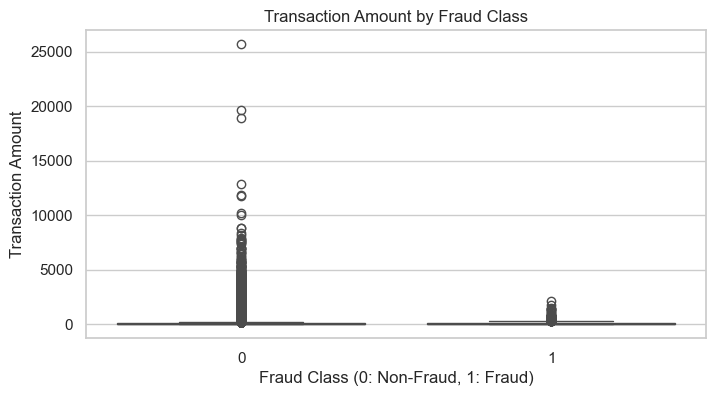

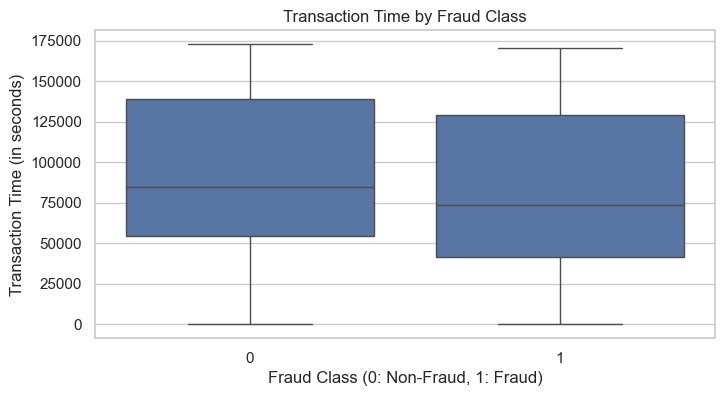

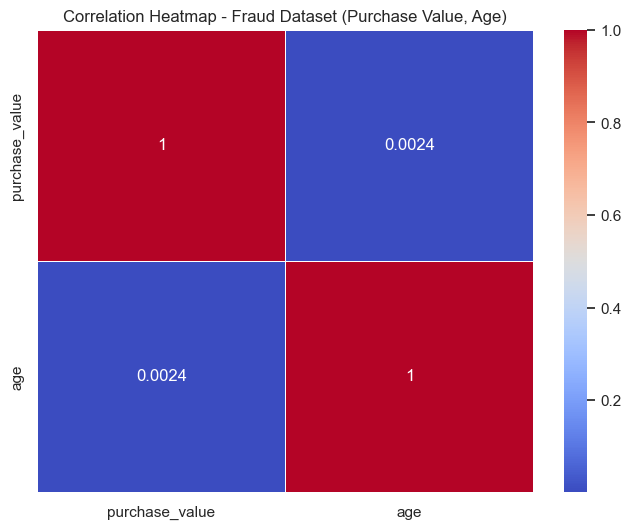

In [139]:
# Bivariate Analysis
# Transaction Amount vs Fraud Class
plt.figure(figsize=(8, 4))
sns.boxplot(x='Class', y='Amount', data=df)
plt.title('Transaction Amount by Fraud Class')
plt.xlabel('Fraud Class (0: Non-Fraud, 1: Fraud)')
plt.ylabel('Transaction Amount')
plt.show()

# Time vs Fraud Class
plt.figure(figsize=(8, 4))
sns.boxplot(x='Class', y='Time', data=df)
plt.title('Transaction Time by Fraud Class')
plt.xlabel('Fraud Class (0: Non-Fraud, 1: Fraud)')
plt.ylabel('Transaction Time (in seconds)')
plt.show()

#Fraud Dataset Correlation Heatmap
fraud_numerical_features = ['purchase_value', 'age']  
if set(fraud_numerical_features).issubset(df1.columns):
    plt.figure(figsize=(8, 6))
    sns.heatmap(df1[fraud_numerical_features].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
    plt.title('Correlation Heatmap - Fraud Dataset (Purchase Value, Age)')
    plt.show()



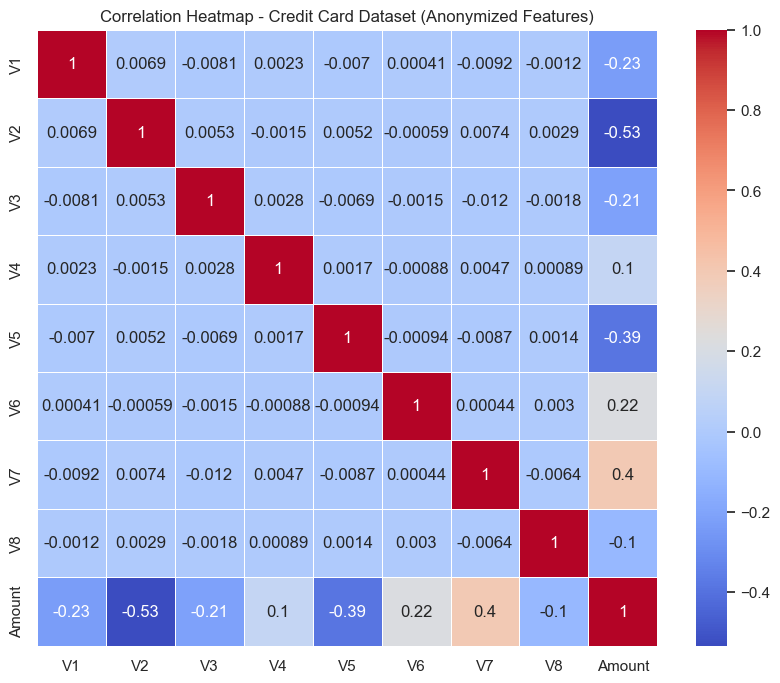

In [140]:
#Credit Card Dataset Correlation Heatmap
# Sample Anonymized features in the credit card dataset
creditcard_numerical_features = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'Amount']

# Check if the features exist in creditcard_df before plotting
if set(creditcard_numerical_features).issubset(df.columns):
    plt.figure(figsize=(10, 8))
    sns.heatmap(df[creditcard_numerical_features].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
    plt.title('Correlation Heatmap - Credit Card Dataset (Anonymized Features)')
    plt.show()


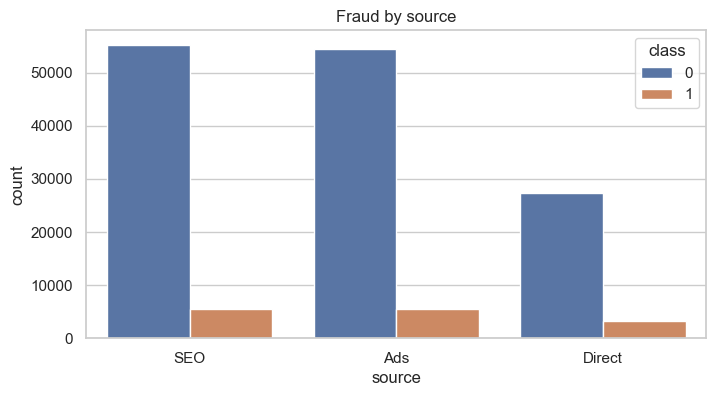

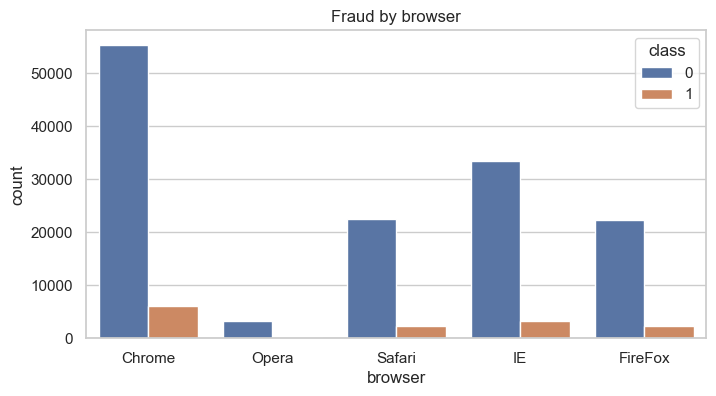

In [141]:
# Bar plots or count plots to analyze fraud (class) by categorical features
categorical_features_for_fraud = ['source', 'browser'] 
for feature in categorical_features_for_fraud:
    if feature in df1.columns:
        plt.figure(figsize=(8, 4))
        sns.countplot(x=feature, hue='class', data=df1)
        plt.title(f'Fraud by {feature}')
        plt.show()

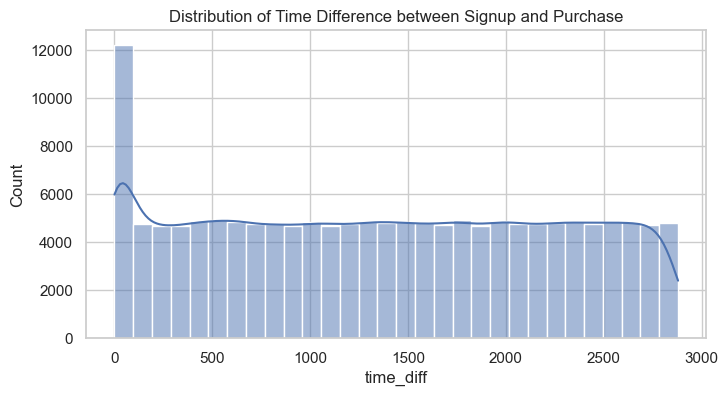

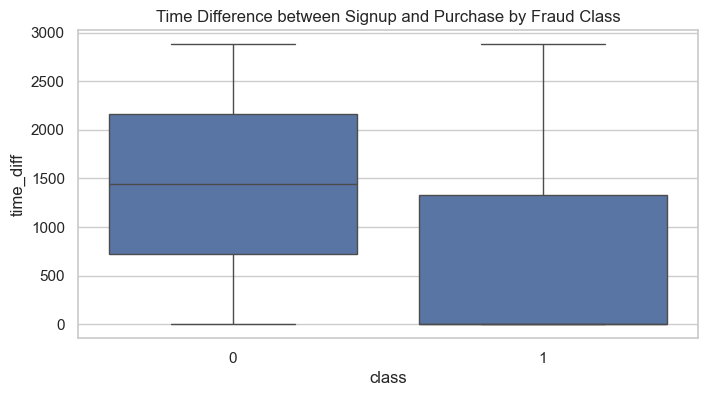

In [142]:
# 6. Plot time difference between signup_time and purchase_time
if 'signup_time' in df1.columns and 'purchase_time' in df1.columns:
    # Convert to datetime if not already done
    df1['signup_time'] = pd.to_datetime(df1['signup_time'], errors='coerce')
    df1['purchase_time'] = pd.to_datetime(df1['purchase_time'], errors='coerce')

    # Create a new feature for the time difference
    df1['time_diff'] = (df1['purchase_time'] - df1['signup_time']).dt.total_seconds() / 3600.0  # In hours

    # Plot the time difference
    plt.figure(figsize=(8, 4))
    sns.histplot(df1['time_diff'], kde=True, bins=30)
    plt.title('Distribution of Time Difference between Signup and Purchase')
    plt.show()

    # Analyze time difference by fraud class
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='class', y='time_diff', data=df1)
    plt.title('Time Difference between Signup and Purchase by Fraud Class')
    plt.show()


## Merge Datasets for Geolocation analysis

In [143]:
# Sort both DataFrames by ip_address and lower_bound_ip_address for asof merge
fraud_data = df1.sort_values(by='ip_address')
ip_data = df2.sort_values(by='lower_bound_ip_address')

# Perform an asof merge on ip_address to find the closest lower_bound_ip_address
merged_data = pd.merge_asof(
    fraud_data, 
    ip_data, 
    left_on='ip_address', 
    right_on='lower_bound_ip_address',
    direction='backward'  # Ensures that we match the closest lower bound less than or equal to ip_address
)

# Now filter rows where the ip_address falls within the lower and upper bounds
merged_data = merged_data[
    (merged_data['ip_address'] >= merged_data['lower_bound_ip_address']) &
    (merged_data['ip_address'] <= merged_data['upper_bound_ip_address'])
]


display(merged_data)


,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,time_diff,lower_bound_ip_address,upper_bound_ip_address,country
634,247547,2015-06-28 03:00:34,2015-08-09 03:57:29,47,KIXYSVCHIPQBR,SEO,Safari,F,30,1.677886e+07,0,1008.948611,1.677824e+07,1.677926e+07,Australia
635,220737,2015-01-28 14:21:11,2015-02-11 20:28:28,15,PKYOWQKWGJNJI,SEO,Chrome,F,34,1.684205e+07,0,342.121389,1.680998e+07,1.684275e+07,Thailand
636,390400,2015-03-19 20:49:09,2015-04-11 23:41:23,44,LVCSXLISZHVUO,Ads,IE,M,29,1.684366e+07,0,554.870556,1.684326e+07,1.684378e+07,China
637,69592,2015-02-24 06:11:57,2015-05-23 16:40:14,55,UHAUHNXXUADJE,Direct,Chrome,F,30,1.693873e+07,0,2122.471389,1.692467e+07,1.694106e+07,China
638,174987,2015-07-07 12:58:11,2015-11-03 04:04:30,51,XPGPMOHIDRMGE,SEO,Chrome,F,37,1.697198e+07,0,2847.105278,1.694106e+07,1.697382e+07,Thailand
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131724,33024,2015-04-12 21:07:04,2015-05-12 22:42:35,56,PRYMTRKRYXEZC,Direct,Opera,F,18,3.757992e+09,0,721.591944,3.757965e+09,3.758031e+09,China
131725,62132,2015-08-07 10:46:59,2015-08-27 22:35:23,36,XAZBVQEIGZMVM,Direct,Chrome,F,36,3.758008e+09,0,491.806667,3.757965e+09,3.758031e+09,China
131726,363333,2015-02-09 07:56:12,2015-03-19 16:55:29,37,LPFTNUDBBWDVD,SEO,FireFox,M,42,3.758019e+09,0,920.988056,3.757965e+09,3.758031e+09,China
131727,340800,2015-05-10 19:31:22,2015-05-15 09:27:33,9,VUDMWVCEHXMCV,Direct,Chrome,F,37,3.758029e+09,0,109.936389,3.757965e+09,3.758031e+09,China


In [144]:
# Fraud_Data.csv

# 5.1 Transaction Frequency (Count of transactions per user)
merged_data['transaction_count'] = merged_data.groupby('user_id')['user_id'].transform('count')

# 5.2 Time-based features: Hour of the day and Day of the week for purchase_time
merged_data['hour_of_day'] = merged_data['purchase_time'].dt.hour
merged_data['day_of_week'] = merged_data['purchase_time'].dt.dayofweek

# creditcard.csv

# 5.3 Time-based features: Convert 'Time' into days
df['time_in_days'] = df['Time'] / (60*60*24)  # Convert seconds to days

In [145]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
# Fraud_Data.csv - Scale 'purchase_value'
scaler = StandardScaler()
merged_data['purchase_value_scaled'] = scaler.fit_transform(merged_data[['purchase_value']])

# creditcard.csv - Scale 'Amount'
df['Amount_scaled'] = scaler.fit_transform(df[['Amount']])

In [146]:
categorical_features = ['source', 'browser', 'country']
merged_data= pd.get_dummies(merged_data, columns=categorical_features, drop_first=True)

le = LabelEncoder()
merged_data['sex'] = le.fit_transform(merged_data['sex'])

# No categorical features to encode in IpAddress_to_Country or creditcard datasets.
display(merged_data.head())

,user_id,signup_time,purchase_time,purchase_value,device_id,sex,age,ip_address,class,time_diff,...,country_United States,country_Uruguay,country_Uzbekistan,country_Vanuatu,country_Venezuela,country_Viet Nam,country_Virgin Islands (U.S.),country_Yemen,country_Zambia,country_Zimbabwe
634,247547,2015-06-28 03:00:34,2015-08-09 03:57:29,47,KIXYSVCHIPQBR,0,30,1.677886e+07,0,1008.948611,...,False,False,False,False,False,False,False,False,False,False
635,220737,2015-01-28 14:21:11,2015-02-11 20:28:28,15,PKYOWQKWGJNJI,0,34,1.684205e+07,0,342.121389,...,False,False,False,False,False,False,False,False,False,False
636,390400,2015-03-19 20:49:09,2015-04-11 23:41:23,44,LVCSXLISZHVUO,1,29,1.684366e+07,0,554.870556,...,False,False,False,False,False,False,False,False,False,False
637,69592,2015-02-24 06:11:57,2015-05-23 16:40:14,55,UHAUHNXXUADJE,0,30,1.693873e+07,0,2122.471389,...,False,False,False,False,False,False,False,False,False,False
638,174987,2015-07-07 12:58:11,2015-11-03 04:04:30,51,XPGPMOHIDRMGE,0,37,1.697198e+07,0,2847.105278,...,False,False,False,False,False,False,False,False,False,False


In [147]:
# Summary of Dataset Shapes
print(f"merged_data shape: {merged_data.shape}")
print(f"Fraud_Data shape: {fraud_data.shape}")
print(f"IpAddress_to_Country shape: {ip_data.shape}")
print(f"Creditcard shape: {df.shape}")

merged_data shape: (129146, 202)
Fraud_Data shape: (151112, 12)
IpAddress_to_Country shape: (138846, 3)
Creditcard shape: (283726, 33)


In [148]:
# Save the preprocessed Fraud_Data.csv
fraud_data.to_csv('C:/Users/elbet/OneDrive/Desktop/Ten/week8&9/github/Fraud_detection/cleaned_data/Preprocessed_Fraud_Data.csv', index=False)
#save the merged data
merged_data.to_csv('C:/Users/elbet/OneDrive/Desktop/Ten/week8&9/github/Fraud_detection/cleaned_data/merged_data.csv', index=False)

# Save the preprocessed IpAddress_to_Country.csv
ip_data.to_csv('C:/Users/elbet/OneDrive/Desktop/Ten/week8&9/github/Fraud_detection/cleaned_data/Preprocessed_IpAddress_to_Country.csv', index=False)

# Save the preprocessed creditcard.csv
df.to_csv('C:/Users/elbet/OneDrive/Desktop/Ten/week8&9/github/Fraud_detection/cleaned_data/Preprocessed_Creditcard_Data.csv', index=False)